In [1]:
#read FDDB dataset
import cv2
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('FDDB2XYWH.csv')
data = data.drop('Unnamed: 0', 1)
#data['File_Path'] = './VOCdevkit2007/VOC2007/JPEGImages/' + data['Frame']
#data = data[(data['label'] == 0)].reset_index()
print(data.head())

                        Frame  x_center  y_center      w      h    s  \
0  2002/08/18/big/img_181.jpg     462.0     357.0  258.0  149.0  1.0   
1  2002/08/18/big/img_181.jpg     674.0      73.0   98.0   54.0  1.0   
2  2002/08/18/big/img_181.jpg     849.0     127.0  111.0   61.0  1.0   
3  2002/08/10/big/img_520.jpg     530.0     274.0  828.0  458.0  1.0   
4  2002/08/25/big/img_705.jpg     459.0     337.0  918.0  489.0  1.0   

                                    FileName  
0  ./originalPics/2002/08/18/big/img_181.jpg  
1  ./originalPics/2002/08/18/big/img_181.jpg  
2  ./originalPics/2002/08/18/big/img_181.jpg  
3  ./originalPics/2002/08/10/big/img_520.jpg  
4  ./originalPics/2002/08/25/big/img_705.jpg  


['.', 'originalPics', '2002', '08', '24', 'big', 'img_528.jpg']
2002/08/24/big/
2002/08/24/big/img_528.jpg
   index                       Frame  x_center  y_center      w      h    s  \
0   4483  2002/08/24/big/img_528.jpg     222.0     250.0  194.0  194.0  1.0   
1   4484  2002/08/24/big/img_528.jpg     422.0     330.0   47.0   47.0  1.0   
2   4485  2002/08/24/big/img_528.jpg     599.0      58.0   98.0  107.0  1.0   
3   4486  2002/08/24/big/img_528.jpg     442.0     151.0   36.0   37.0  1.0   
4   4487  2002/08/24/big/img_528.jpg     877.0     303.0   75.0   74.0  1.0   
5   4488  2002/08/24/big/img_528.jpg     734.0     405.0   32.0   31.0  1.0   
6   4489  2002/08/24/big/img_528.jpg     753.0      23.0   26.0   29.0  1.0   

                                    FileName  
0  ./originalPics/2002/08/24/big/img_528.jpg  
1  ./originalPics/2002/08/24/big/img_528.jpg  
2  ./originalPics/2002/08/24/big/img_528.jpg  
3  ./originalPics/2002/08/24/big/img_528.jpg  
4  ./originalPics/2002/08

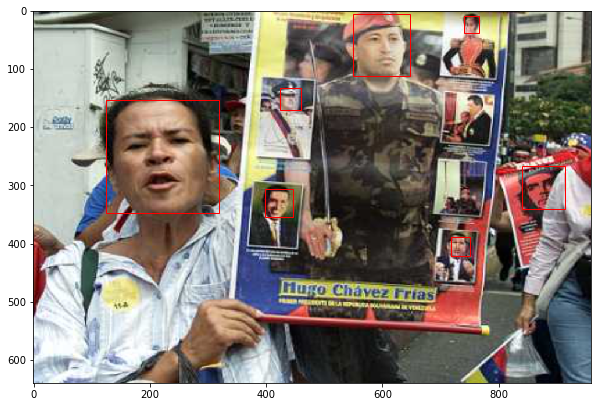

In [3]:
#This jupyter version only used on conv5-3, here I am not use multi-sclae features from different convolutional layer
import batch_generate
i_line = np.random.randint(len(data))
name_str, img, bb_boxes = batch_generate.get_img_by_name(data, i_line, size = (960, 640),dataset = 'FDDB')
print(bb_boxes)
gta = batch_generate.bbox_transform(bb_boxes)
print(gta)
plt.figure(figsize=(10,10))
plt.imshow(img)
currentAxis = plt.gca()
for i in range(len(gta)):
    currentAxis.add_patch(plt.Rectangle((gta[i,0], gta[i,1]), gta[i,2]-gta[i,0], gta[i,3]-gta[i,1], fill=False, edgecolor= 'r', linewidth=1))